In [1]:
!pip install statsmodels

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
dataset = pd.read_csv('Housing_Macroeconomic_Factors_US.csv')

In [28]:
Y = dataset[['house_price_index']]

In [38]:
X = dataset.drop(['Date'],  axis=1)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   house_price_index  425 non-null    float64
 1   population         425 non-null    int64  
 2   house_supply       425 non-null    float64
 3   gdp                422 non-null    float64
 4   mortgage_rate      422 non-null    float64
 5   employment_rate    422 non-null    float64
 6   permit_new         422 non-null    float64
 7   ppi_res            422 non-null    float64
 8   m3                 422 non-null    float64
 9   cci                422 non-null    float64
 10  delinquency_rate   374 non-null    float64
 11  hcai               285 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 40.0 KB


In [40]:
columns = X.columns
columns

Index(['house_price_index', 'population', 'house_supply', 'gdp',
       'mortgage_rate', 'employment_rate', 'permit_new', 'ppi_res', 'm3',
       'cci', 'delinquency_rate', 'hcai'],
      dtype='object')

In [41]:
X.describe()

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
count,425.000000,425.000000,425.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,374.000000,285.000000
mean,135.887280,291988.251765,5.813412,99.955457,6.328301,70.759327,1346.962085,166.813685,7.666456,100.124667,3.984947,8.981895
std,53.684802,28193.599715,1.691079,1.124453,2.209432,2.247253,394.776877,43.943882,4.656247,1.466327,2.912758,6.855745
min,63.965000,241857.000000,3.300000,91.543057,2.684000,60.261014,513.000000,100.000000,2.743900,96.460330,1.400000,2.293000
25%,81.620000,267829.000000,4.400000,99.559318,4.266250,69.317138,1077.250000,133.500000,3.615025,99.106098,2.130000,2.642000
50%,139.727000,293857.000000,5.500000,99.977924,6.257250,71.221613,1362.000000,154.750000,6.297450,100.498000,2.470000,5.958000
75%,174.802000,317156.000000,6.700000,100.556927,7.912000,72.281388,1614.750000,207.400000,10.617625,101.063150,4.490000,15.779000
max,304.831000,332928.000000,12.200000,101.825852,11.260000,74.507436,2263.000000,303.546000,21.749700,102.977600,11.360000,21.774000


In [42]:
Y.describe()

,house_price_index
count,425.000000
mean,135.887280
std,53.684802
min,63.965000
25%,81.620000
50%,139.727000
75%,174.802000
max,304.831000


In [43]:
dataset.corr(method='pearson')

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
house_price_index,1.000000,0.912175,0.041415,-0.112553,-0.848607,-0.453122,0.085709,0.924660,0.925596,-0.211095,0.108493,-0.446426
population,0.912175,1.000000,-0.051396,-0.168237,-0.959801,-0.568996,-0.125090,0.961313,0.904646,-0.198640,0.396674,-0.812660
house_supply,0.041415,-0.051396,1.000000,0.108612,0.171008,-0.179993,-0.563854,0.014229,-0.049533,-0.547115,0.340315,-0.270590
gdp,-0.112553,-0.168237,0.108612,1.000000,0.278715,0.514897,0.181109,-0.141507,-0.245704,0.369948,-0.137557,0.236192
mortgage_rate,-0.848607,-0.959801,0.171008,0.278715,1.000000,0.629674,0.140572,-0.921363,-0.864389,0.252450,-0.473523,0.791513
employment_rate,-0.453122,-0.568996,-0.179993,0.514897,0.629674,1.000000,0.581210,-0.594075,-0.568585,0.641881,-0.784864,0.649549
permit_new,0.085709,-0.125090,-0.563854,0.181109,0.140572,0.581210,1.000000,-0.181666,-0.081149,0.573992,-0.808944,0.714809
ppi_res,0.924660,0.961313,0.014229,-0.141507,-0.921363,-0.594075,-0.181666,1.000000,0.956496,-0.270802,0.402560,-0.827442
m3,0.925596,0.904646,-0.049533,-0.245704,-0.864389,-0.568585,-0.081149,0.956496,1.000000,-0.213439,0.233534,-0.755793
cci,-0.211095,-0.198640,-0.547115,0.369948,0.252450,0.641881,0.573992,-0.270802,-0.213439,1.000000,-0.589727,0.311164


In [49]:
newdataset = dataset.drop(['hcai','delinquency_rate','m3'],axis=1)

In [50]:
newdataset.corr(method='pearson')

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,cci
house_price_index,1.000000,0.912175,0.041415,-0.112553,-0.848607,-0.453122,0.085709,0.924660,-0.211095
population,0.912175,1.000000,-0.051396,-0.168237,-0.959801,-0.568996,-0.125090,0.961313,-0.198640
house_supply,0.041415,-0.051396,1.000000,0.108612,0.171008,-0.179993,-0.563854,0.014229,-0.547115
gdp,-0.112553,-0.168237,0.108612,1.000000,0.278715,0.514897,0.181109,-0.141507,0.369948
mortgage_rate,-0.848607,-0.959801,0.171008,0.278715,1.000000,0.629674,0.140572,-0.921363,0.252450
employment_rate,-0.453122,-0.568996,-0.179993,0.514897,0.629674,1.000000,0.581210,-0.594075,0.641881
permit_new,0.085709,-0.125090,-0.563854,0.181109,0.140572,0.581210,1.000000,-0.181666,0.573992
ppi_res,0.924660,0.961313,0.014229,-0.141507,-0.921363,-0.594075,-0.181666,1.000000,-0.270802
cci,-0.211095,-0.198640,-0.547115,0.369948,0.252450,0.641881,0.573992,-0.270802,1.000000


In [51]:
X

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
0,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.000,2.7439,100.46240,NaN,NaN
1,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.400,2.7475,100.49450,NaN,NaN
2,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.700,2.7537,100.57200,NaN,NaN
3,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.100,2.7677,100.65680,NaN,NaN
4,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.300,2.7729,100.69190,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
420,284.767,332684,5.7,100.091744,3.4450,70.748899,1841.0,294.807,21.6593,97.49467,2.13,NaN
421,290.371,332750,6.0,100.034014,3.7625,70.890307,1857.0,303.546,21.7497,97.18996,2.13,NaN
422,296.496,332812,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
423,301.704,332863,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

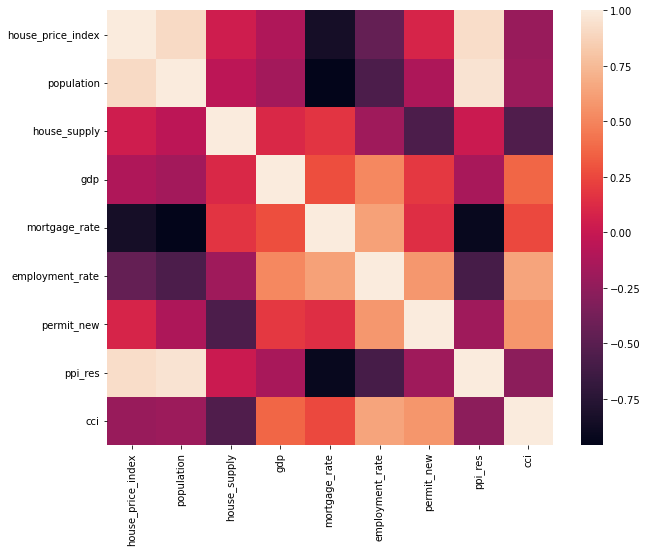

In [52]:
plt.subplots(figsize=(10,8))
sns.heatmap(newdataset.corr())

In [65]:
newdataset = dataset.drop(['gdp','permit_new'],axis=1)

In [66]:
newdataset.corr(method='pearson')

,house_price_index,population,house_supply,mortgage_rate,employment_rate,ppi_res,m3,cci,delinquency_rate,hcai
house_price_index,1.000000,0.912175,0.041415,-0.848607,-0.453122,0.924660,0.925596,-0.211095,0.108493,-0.446426
population,0.912175,1.000000,-0.051396,-0.959801,-0.568996,0.961313,0.904646,-0.198640,0.396674,-0.812660
house_supply,0.041415,-0.051396,1.000000,0.171008,-0.179993,0.014229,-0.049533,-0.547115,0.340315,-0.270590
mortgage_rate,-0.848607,-0.959801,0.171008,1.000000,0.629674,-0.921363,-0.864389,0.252450,-0.473523,0.791513
employment_rate,-0.453122,-0.568996,-0.179993,0.629674,1.000000,-0.594075,-0.568585,0.641881,-0.784864,0.649549
ppi_res,0.924660,0.961313,0.014229,-0.921363,-0.594075,1.000000,0.956496,-0.270802,0.402560,-0.827442
m3,0.925596,0.904646,-0.049533,-0.864389,-0.568585,0.956496,1.000000,-0.213439,0.233534,-0.755793
cci,-0.211095,-0.198640,-0.547115,0.252450,0.641881,-0.270802,-0.213439,1.000000,-0.589727,0.311164
delinquency_rate,0.108493,0.396674,0.340315,-0.473523,-0.784864,0.402560,0.233534,-0.589727,1.000000,-0.570729
hcai,-0.446426,-0.812660,-0.270590,0.791513,0.649549,-0.827442,-0.755793,0.311164,-0.570729,1.000000


<AxesSubplot:>

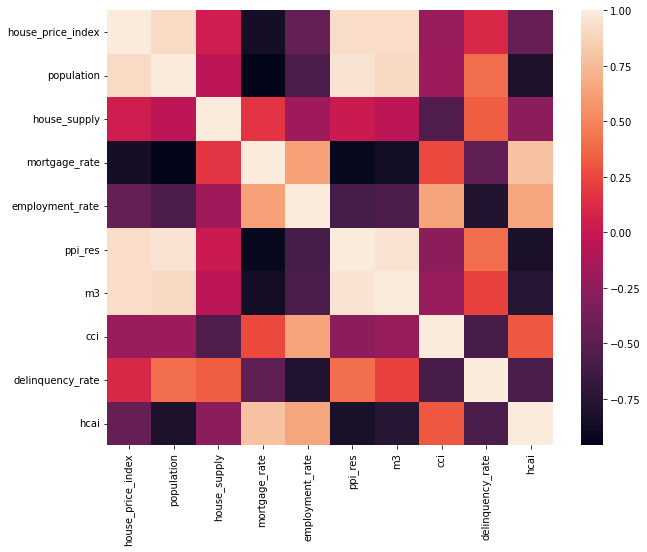

In [67]:
plt.subplots(figsize=(10,8))
sns.heatmap(newdataset.corr())

In [77]:
newdataset.describe()

,const,house_price_index,population,house_supply,mortgage_rate,employment_rate,ppi_res,m3,cci,delinquency_rate,hcai
count,425.0,425.000000,425.000000,425.000000,422.000000,422.000000,422.000000,422.000000,422.000000,374.000000,285.000000
mean,1.0,135.887280,291988.251765,5.813412,6.328301,70.759327,166.813685,7.666456,100.124667,3.984947,8.981895
std,0.0,53.684802,28193.599715,1.691079,2.209432,2.247253,43.943882,4.656247,1.466327,2.912758,6.855745
min,1.0,63.965000,241857.000000,3.300000,2.684000,60.261014,100.000000,2.743900,96.460330,1.400000,2.293000
25%,1.0,81.620000,267829.000000,4.400000,4.266250,69.317138,133.500000,3.615025,99.106098,2.130000,2.642000
50%,1.0,139.727000,293857.000000,5.500000,6.257250,71.221613,154.750000,6.297450,100.498000,2.470000,5.958000
75%,1.0,174.802000,317156.000000,6.700000,7.912000,72.281388,207.400000,10.617625,101.063150,4.490000,15.779000
max,1.0,304.831000,332928.000000,12.200000,11.260000,74.507436,303.546000,21.749700,102.977600,11.360000,21.774000
